In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#Data Cleaning

In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-bel Abbes Region Dataset"

Add new column with region

In [5]:
df.loc[:122,'Region']=0
df.loc[122:,"Region"]=1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [7]:
df[['Region']]=df[["Region"]].astype(int)

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [10]:
##Removing the null values
df = df.dropna().reset_index(drop=True)

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [14]:
df = df.drop(122).reset_index(drop=True)

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
## fix spaces in columns names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


## Change the required columns as integer data type

In [18]:
df[["month",'day','year','Temperature','RH','Ws']] = df[["month",'day','year','Temperature','RH','Ws']].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


###Changing the other columns to float data datatypes

In [20]:
objects = [features for features in df.columns if df[features].dtypes=='O']

In [21]:
for i in objects:
  if i!='Classes':
    df[i]=df[i].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Lets save the cleaned dataset

In [24]:
df.to_csv("Algerian_forest_fires_cleaned_dataset.csv",index=False)

# Exploratory Data Analysis

In [25]:
#drop day-month-year
df_copy = df.drop(['day','month',"year"],axis=1)

In [26]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [27]:
df_copy["Classes"].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [28]:
## Encoding of the categories in classes
df_copy['Classes']= np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [29]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


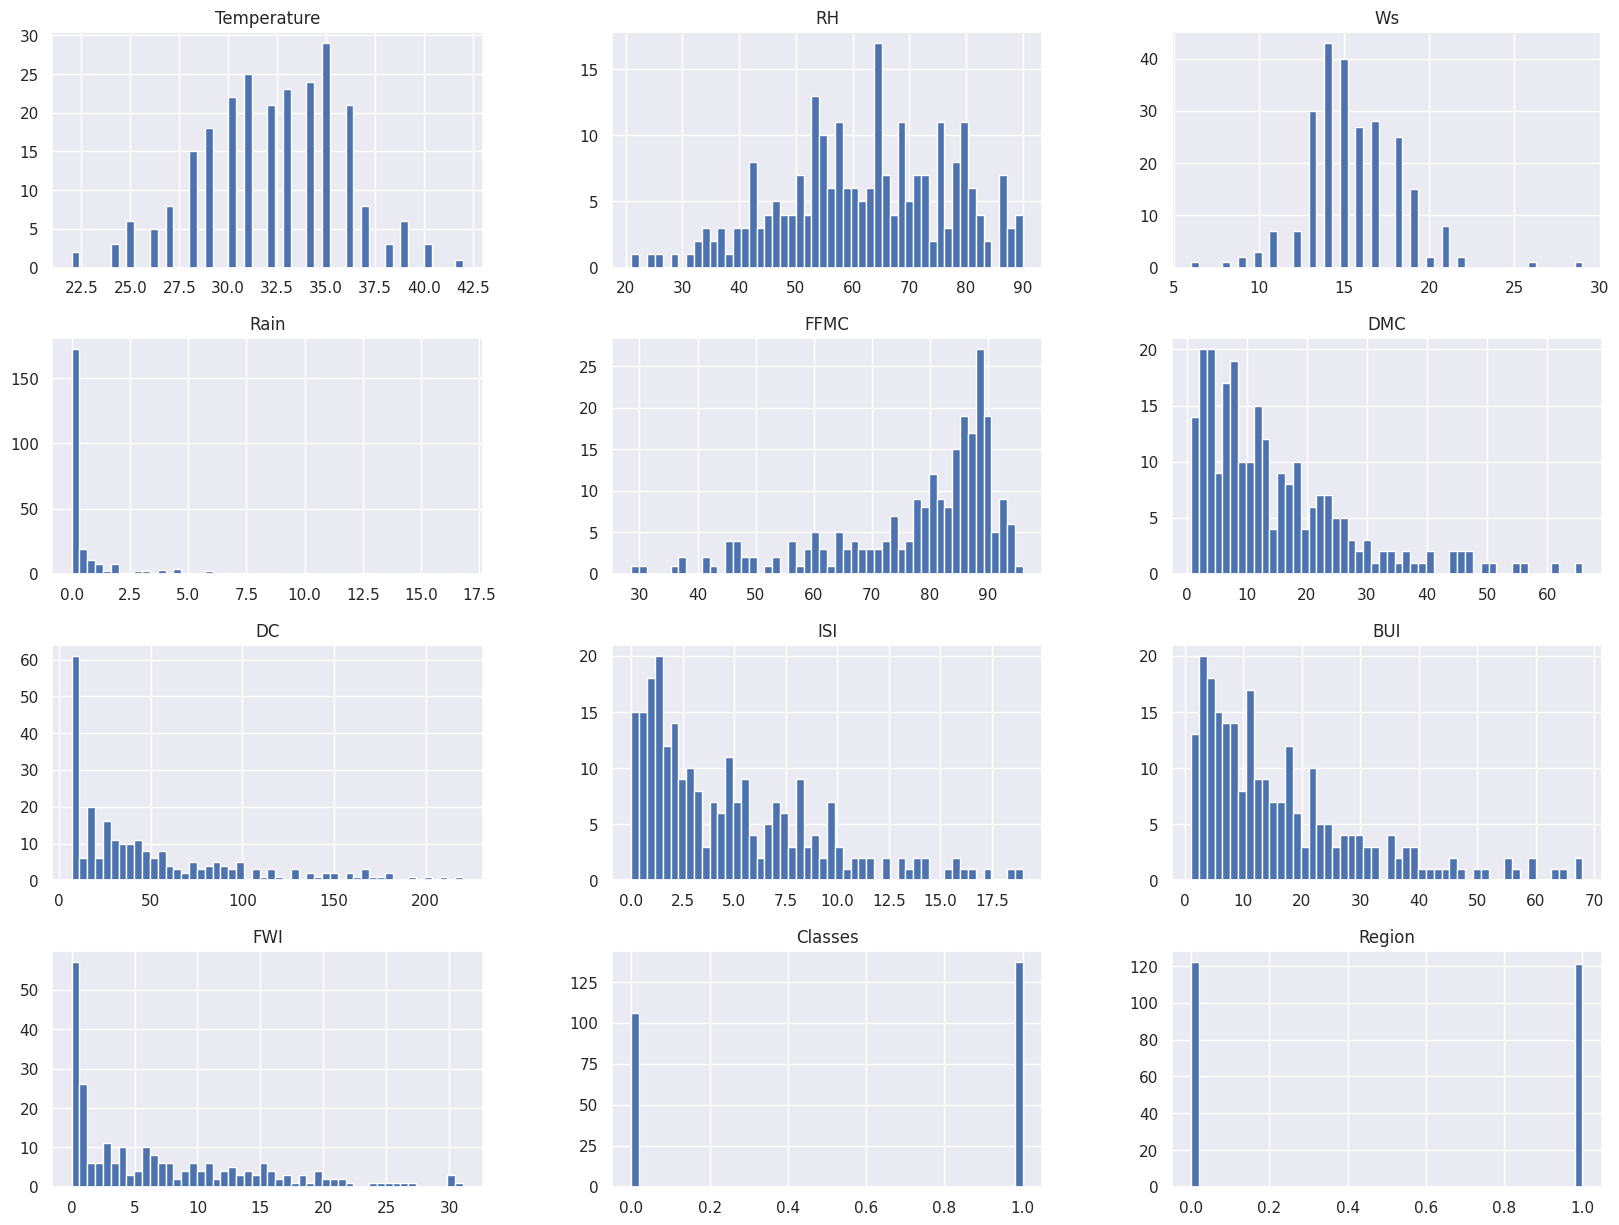

In [31]:
## Plot density plot for all features
sns.set_theme()
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [32]:
## Percentage for Pie Chart
Percentage = df_copy['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie Chart of Classes')

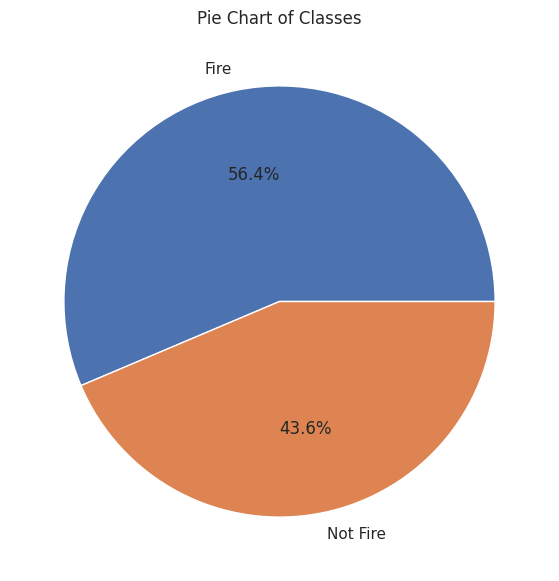

In [33]:
#Ploting pie chart
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(Percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")

In [34]:
## Correlation

In [35]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

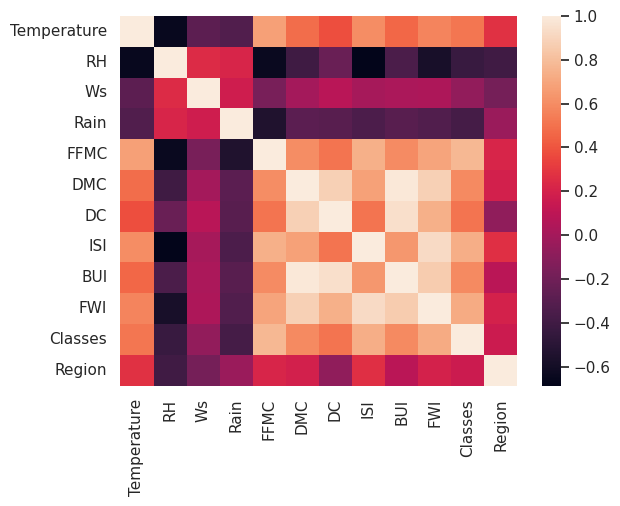

In [36]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

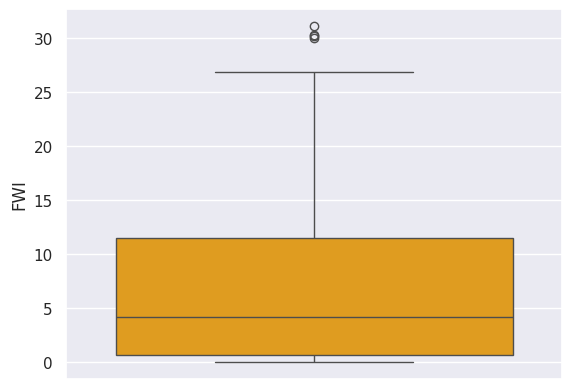

In [37]:
##Box plots
sns.boxplot(df_copy['FWI'],color="orange")

In [38]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [39]:
df['Classes']= np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region')

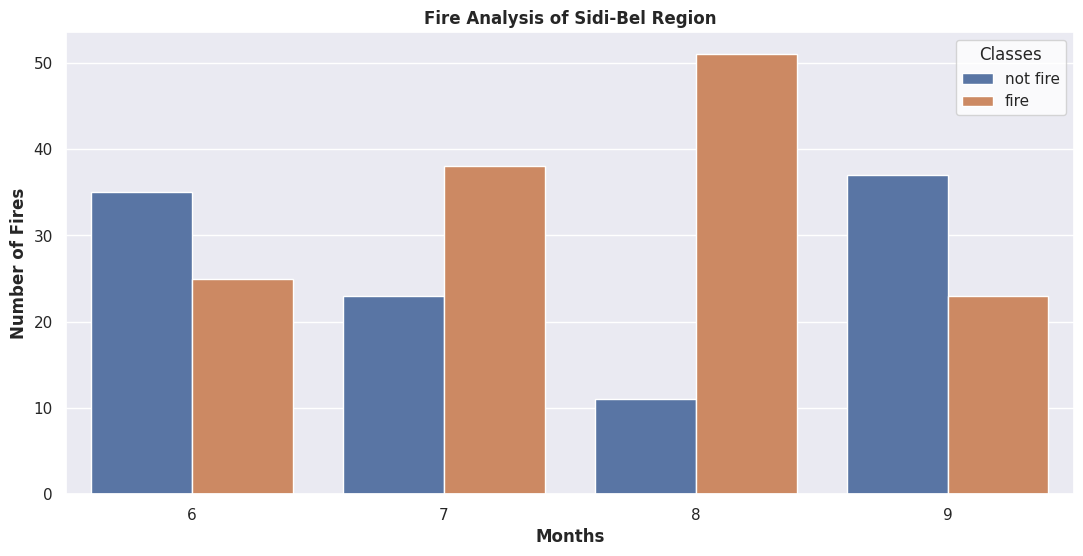

In [40]:
## Monthly ffire analysis
df_temp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of Fires",weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel Region",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Region')

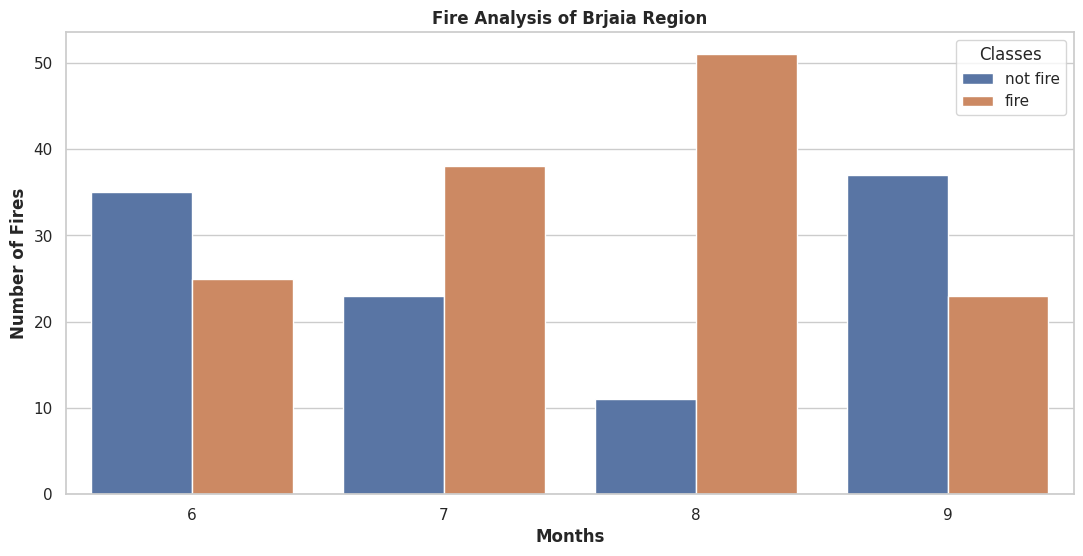

In [41]:
## Monthly ffire analysis
df_temp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of Fires",weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Region",weight='bold')

Its observed that August and September had the most number of forest fires for both regions, And from the above plot of months we can understan few things

Most of the fires happened in August and very high fires happened in only 3 months - June, July and August.

Less Fires was on September.

#Feature Engineering

In [42]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [43]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [45]:
df = df.drop(["day","month","year"],axis=True)

In [46]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [47]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [48]:
##Encoding
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [49]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [50]:
df["Classes"].value_counts()

,count
Classes,
1,137
0,106


In [51]:
## Independent and dependent features
x=df.drop("FWI",axis=1)
y=df["FWI"]

In [52]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [53]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [54]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [55]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [56]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

## Feature Selection based on correlation

<Axes: >

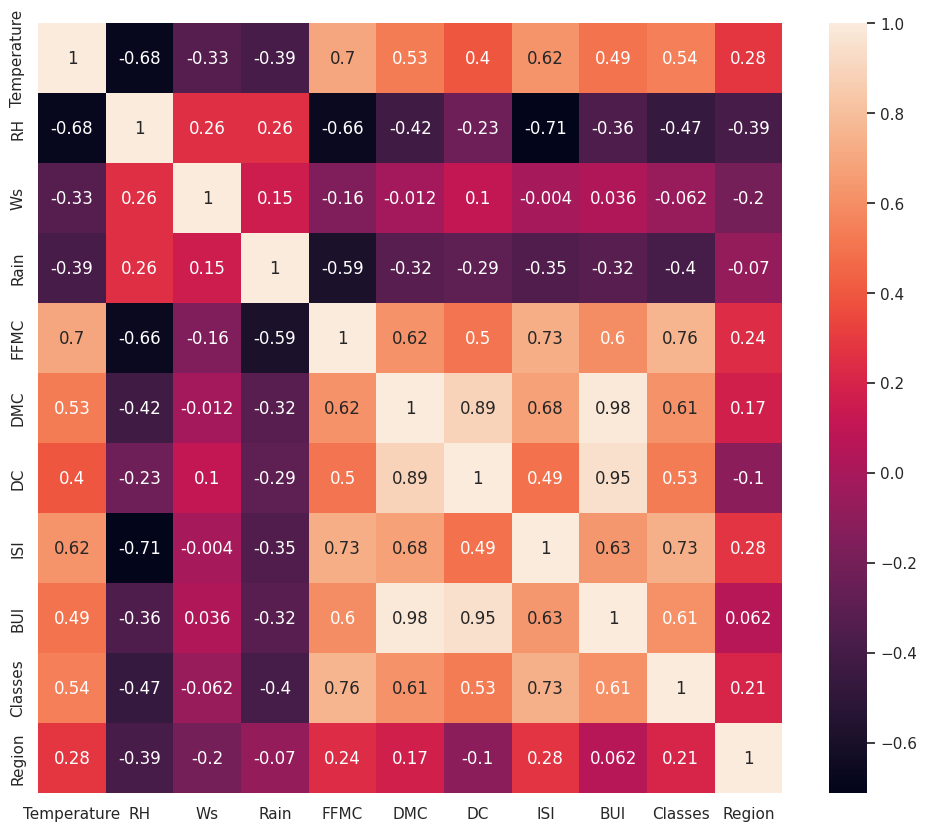

In [57]:
## check for Multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot = True)

In [58]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j])> threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [59]:
## Threshold -- Domain Expertise
corr_feature = correlation(X_train,0.85)

In [60]:
## Drop feature when correlation is more than 0.85
X_train.drop(corr_feature, axis=1, inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [62]:
X_train_scaled

array([[-1.63212951,  1.27020172,  2.23710513, ..., -1.04511577,
        -1.11665285, -1.02222494],
       [-0.59259295, -0.52285866, -0.56119819, ..., -0.81519788,
        -1.11665285,  0.97825827],
       [-1.89201365,  1.71846682, -0.91098611, ..., -1.11409114,
        -1.11665285, -1.02222494],
       ...,
       [-1.11236123,  0.50174727, -0.21141028, ..., -0.5622882 ,
        -1.11665285,  0.97825827],
       [-0.85247709,  1.71846682, -0.91098611, ..., -1.11409114,
        -1.11665285, -1.02222494],
       [ 0.18705946,  0.37367153, -0.21141028, ...,  0.08148189,
         0.89553347,  0.97825827]])

## Box Plots To understand Effect of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

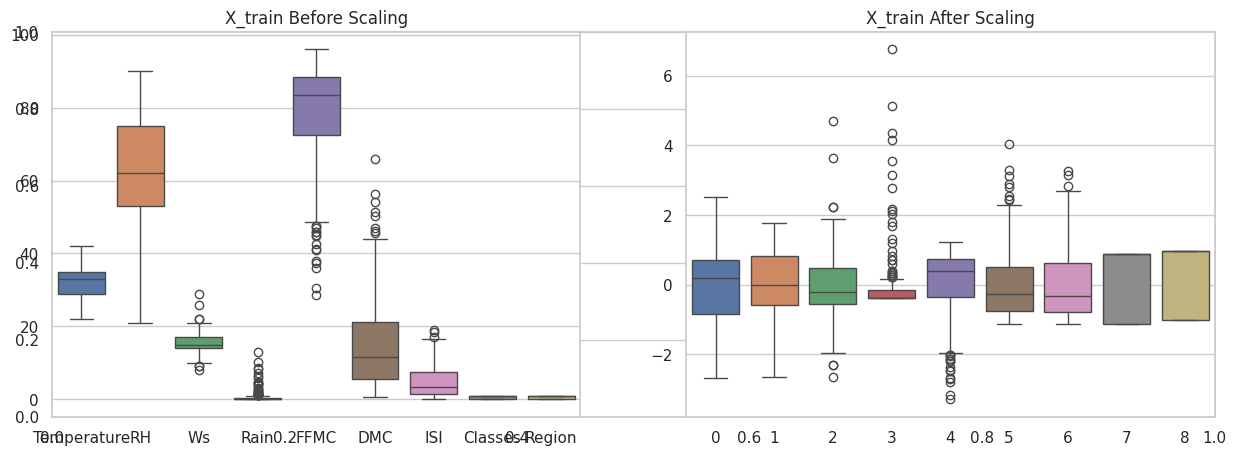

In [63]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

#Linear regression Model

Mean absolute Error 0.6751429885982669
R2 Score 0.9809475887574661


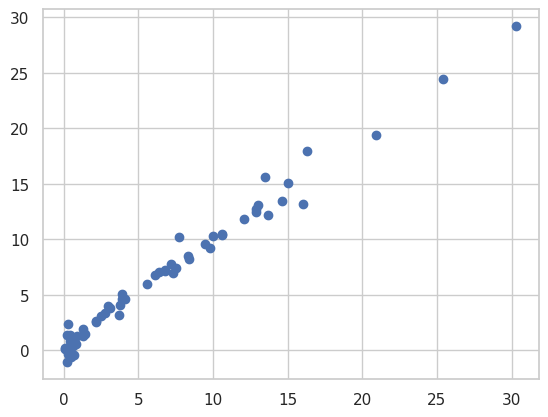

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute Error 1.1223078609006056
R2 Score 0.951307107526612


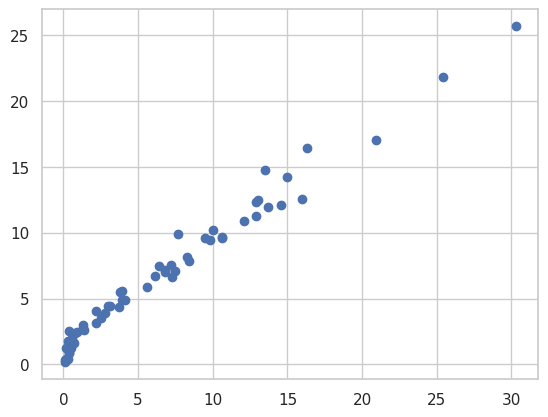

In [65]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso

In [66]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [67]:
lassocv.alphas_

array([7.07357757, 6.59684211, 6.15223703, 5.73759685, 5.35090202,
       4.99026914, 4.6539417 , 4.3402816 , 4.04776115, 3.7749556 ,
       3.52053622, 3.28326386, 3.06198287, 2.85561547, 2.66315655,
       2.48366871, 2.31627775, 2.16016838, 2.01458026, 1.8788043 ,
       1.75217917, 1.63408816, 1.52395609, 1.42124655, 1.32545929,
       1.23612777, 1.15281689, 1.07512089, 1.00266134, 0.93508533,
       0.8720637 , 0.81328953, 0.75847654, 0.70735776, 0.65968421,
       0.6152237 , 0.57375968, 0.5350902 , 0.49902691, 0.46539417,
       0.43402816, 0.40477611, 0.37749556, 0.35205362, 0.32832639,
       0.30619829, 0.28556155, 0.26631565, 0.24836687, 0.23162777,
       0.21601684, 0.20145803, 0.18788043, 0.17521792, 0.16340882,
       0.15239561, 0.14212465, 0.13254593, 0.12361278, 0.11528169,
       0.10751209, 0.10026613, 0.09350853, 0.08720637, 0.08132895,
       0.07584765, 0.07073578, 0.06596842, 0.06152237, 0.05737597,
       0.05350902, 0.04990269, 0.04653942, 0.04340282, 0.04047

In [68]:
lassocv.mse_path_

array([[95.72395838, 68.16404831, 52.61667733, 41.05276106, 32.39947263],
       [95.72395838, 66.26237091, 46.57322121, 36.05839662, 28.65036899],
       [93.02978603, 58.510214  , 41.34416499, 31.50317115, 25.00216615],
       [84.29494886, 51.30207842, 36.39910746, 27.53581764, 21.61161021],
       [76.59068146, 45.02084905, 31.7619527 , 24.12960978, 18.67831896],
       [69.78997274, 39.54675061, 27.73490434, 21.20839837, 16.1415664 ],
       [63.78186822, 34.77530866, 24.23854963, 18.70608457, 13.94901877],
       [58.46941144, 30.6155859 , 21.20316119, 16.56578368, 12.05477222],
       [51.94840685, 26.98878666, 18.56832273, 14.73778739, 10.41911543],
       [46.15281967, 23.82598591, 16.28130018, 13.17915795,  9.00756734],
       [41.06695066, 21.0673132 , 14.29689255, 11.85270267,  7.79019198],
       [36.6014337 , 18.66065815, 12.57516375, 10.72600777,  6.74086397],
       [32.67830389, 16.56057399, 11.08161584,  9.77162382,  5.83732673],
       [29.22882751, 14.72777187,  9.7

Mean absolute error 0.6706575152995369
R2_Score 0.9813517716513692


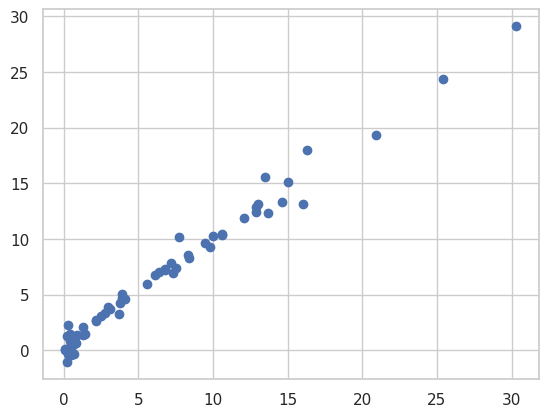

In [69]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2_Score",score)

## Ridge Regression Model

Mean absolute Error 0.6889641391358033
R2 Score 0.9803682082606612


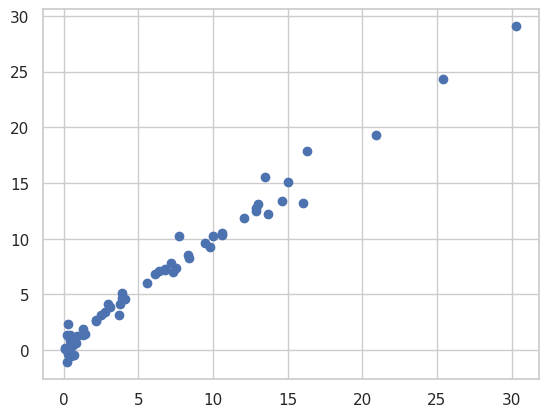

In [70]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6889641391362054
R2_Score 0.9803682082606314


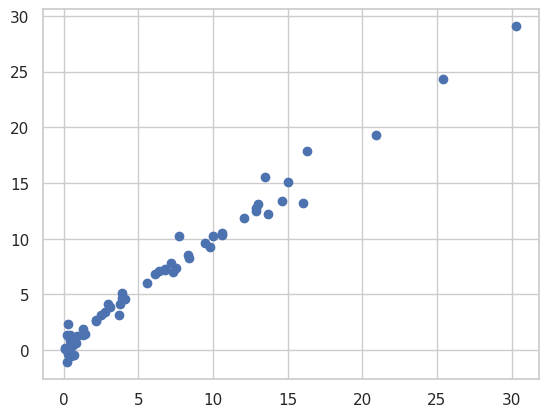

In [71]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2_Score",score)

In [72]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elasticnet Regression

Mean absolute Error 1.7247492609782789
R2 Score 0.8816815298550719


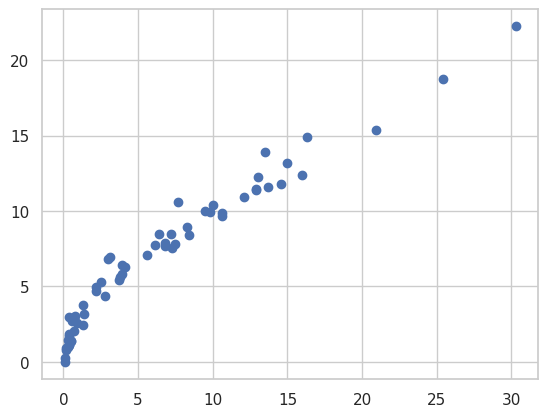

In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
en = ElasticNet()
en.fit(X_train_scaled,y_train)
y_pred = en.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6913256421555171
R2_Score 0.9803532279111443


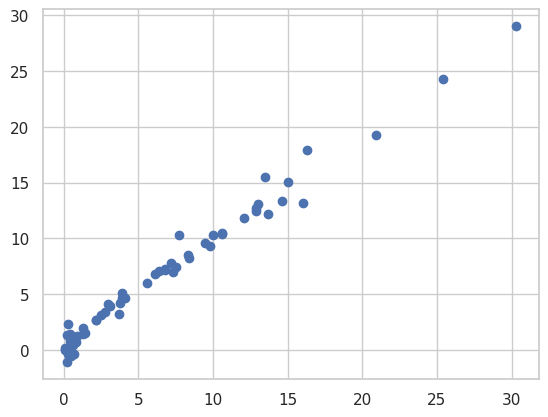

In [74]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV()
elasticnetcv.fit(X_train_scaled,y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2_Score",score)

In [75]:
elasticnetcv.alphas_

array([14.14715513, 13.19368422, 12.30447406, 11.47519369, 10.70180405,
        9.98053827,  9.30788339,  8.68056321,  8.0955223 ,  7.54991119,
        7.04107245,  6.56652773,  6.12396574,  5.71123094,  5.32631309,
        4.96733742,  4.6325555 ,  4.32033676,  4.02916052,  3.75760859,
        3.50435835,  3.26817632,  3.04791218,  2.8424931 ,  2.65091858,
        2.47225554,  2.30563379,  2.15024179,  2.00532269,  1.87017065,
        1.74412741,  1.62657906,  1.51695307,  1.41471551,  1.31936842,
        1.23044741,  1.14751937,  1.0701804 ,  0.99805383,  0.93078834,
        0.86805632,  0.80955223,  0.75499112,  0.70410724,  0.65665277,
        0.61239657,  0.57112309,  0.53263131,  0.49673374,  0.46325555,
        0.43203368,  0.40291605,  0.37576086,  0.35043583,  0.32681763,
        0.30479122,  0.28424931,  0.26509186,  0.24722555,  0.23056338,
        0.21502418,  0.20053227,  0.18701707,  0.17441274,  0.16265791,
        0.15169531,  0.14147155,  0.13193684,  0.12304474,  0.11

## Pickle the machine learning models, Preprocessing model standard scaler

In [76]:
scaler

StandardScaler()

In [77]:
ridge

Ridge()

In [78]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))